## Michelle Leeuw



<h4 type='color:blue'> I had fun recreated  IBM:DPXX05RDEN Guided Project practice course found on Cognitive Class to analyze Medical Appointment </h4>


## Investigate Medical Appointment Dataset 

A person makes a doctor's appointment, receives all the instructions, and no-show. Who to blame?
In this notebook we will try to analyze why would some patient not show up for his medical appointment and whether there are reasons for that using the data we have. We will try to find some correlation between the different attributes we have and whether the patient shows up or not. The dataset we are going to use contains 110.527 medical appointments and its 14 associated variables ( PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Neighbourhood, Scholarship, Hypertension, Diabetes, Alcoholism, Handcap', SMS_received, No-show )

## Objectives

### Questions to answer

*   What is the percentage of no-show?
*   What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
    *   Is the time gender related to whether a patient will show or not?
    *   Are patients with scholarship more likely to miss their appointment?
    *   Are patients who dont recieve sms more likely to miss their appointment?
    *   Is the time difference between the scheduling and appointment related to whether a patient will show?
    *   Does age affect whether a patient will show up or not?
    *   What is the percentage of patients missing their appointments for every neighbourhood


***

### Setup 

In [1]:
#Importing needed modules 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
#choose plots styles 
sns.set_style('darkgrid')
#make sure the plots are inline with the notebook 
%matplotlib inline 

### Data Wrangling 

###### Loading the dataset and checking the columns we have 

In [2]:
pwd

'C:\\Users\\MLeeuw\\Anaconda3\\Data Visualization\\Projects'

In [3]:
## Load your data and print out a few lines. Perform operations to inspect data
### Types and look for instances of missing or possibly errant data.

df = pd.read_excel('C:\\Users\\MLeeuw\\Anaconda3\\Data Visualization\\Projects\\KaggleV2-May-2016.xlsx')

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#get the shape and types of our data 

print(df.shape)
pd.DataFrame(df.dtypes)

(110527, 14)


,0
PatientId,float64
AppointmentID,int64
Gender,object
ScheduledDay,object
AppointmentDay,object
Age,int64
Neighbourhood,object
Scholarship,int64
Hipertension,int64
Diabetes,int64


In [5]:
#Get some statistic about our data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#check if theres any missing values 
df.info()
df.isna().any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [7]:
#heck if there is any duplicated rows 
df.duplicated().any()

False

###### Note on the data exploration 

we can see from the info we got from our analysis that there are some columns that need to have their type corrected like dates . Another great finding is that our data doesnt have any duplicated or missing values. Also the column no-show can be a bit confusing and we can invert the values to make be  more intuitive 

##### Data Cleaning 

   * Drop irrelevemt columns 

   * Modify column names 

   * Correct Dat types 

   * invert no-show column to show with integer values 

   * Create a new column for days difference between scheduling an appointment 

In [8]:
# Drop irrelevent columns 

df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#change all columns name to lowercase and replace - with _
df.columns=df.columns.str.replace('-','_').str.lower()
pd.DataFrame(df.columns)


,0
0,gender
1,scheduledday
2,appointmentday
3,age
4,neighbourhood
5,scholarship
6,hipertension
7,diabetes
8,alcoholism
9,handcap


In [10]:
#Correct Data Type 
#remember schedulesday and appointmentday are object and must be changed to data

df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])



In [11]:
#Rename no_show to show 

df.rename(columns={'no_show': 'show'}, inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#Turn 'NO' AND 'YES' to (1, 0)

print(df.show.unique())
df.show=df.show.map({'No':1 , 'Yes':0})
print(df.show.unique())


['No' 'Yes']
[1 0]


In [13]:
#create a new column  for days difference between scheduling and appointment 

day_diff=(df.appointmentday.dt.date-df.scheduledday.dt.date).dt.days
df.insert(3,'day_diff', day_diff)
df.day_diff.dtype


dtype('int64')

In [14]:
df.head(20)

,gender,scheduledday,appointmentday,day_diff,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,0,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,0,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,2,76,REPÃšBLICA,0,1,0,0,0,0,1
6,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,2,23,GOIABEIRAS,0,0,0,0,0,0,0
7,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,2,39,GOIABEIRAS,0,0,0,0,0,0,0
8,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,0,21,ANDORINHAS,0,0,0,0,0,0,1
9,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,2,19,CONQUISTA,0,0,0,0,0,0,1


In [15]:
#checking data type one last time 
df.dtypes 

gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
day_diff                        int64
age                             int64
neighbourhood                  object
scholarship                     int64
hipertension                    int64
diabetes                        int64
alcoholism                      int64
handcap                         int64
sms_received                    int64
show                            int64
dtype: object

#### Notes on data Cleaning 

Now that we have our data cleaned and with the proper type for every column and also created a new time difference column, we can start analysing our data to find the correlation between the variables and the show column 

## Exploratory Data Analysis

In [16]:
#define function to get the ratio of show in different categories
def plot_rat(x):
    df.groupby(x).show.mean().plot(kind='bar',
                                    edgecolor='black',
                                    figsize=(14,8)).set_ylabel('Ratio of show');
    display(df.groupby(x)[['show']].mean())
#     plt.legend()

#### What is the percentage of no-show ?


In [17]:
df.describe()

,day_diff,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,10.183702,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,15.254996,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,-6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,15.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,179.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [18]:
# percentage of show and no show
print(f"percentage of patients who didn't show up for their appointment is { (1-df.show.mean())*100 } %" )


percentage of patients who didn't show up for their appointment is 20.193255946510803 %


In [19]:
no_show=len(df[df.show==0])/len(df.show)
show=len(df[df.show==1])/len(df.show)


,show
show,
0,22319
1,88208


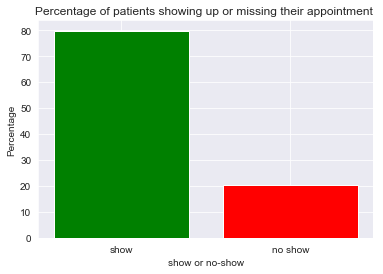

In [20]:
plt.bar(['show','no show'],[show*100,no_show*100],color=['g','r']);
plt.title('Percentage of patients showing up or missing their appointment ');
plt.ylabel('Percentage');
plt.xlabel('show or no-show');
display(df.groupby('show')[['show']].count())

###### What factors are important for us to know in order to predict if a patient will show up fror their schedules appointment 

In [21]:
#create filters for show and no-show
show=(df.show == 1)
no_show=(df.show == 0)
total_miss=len(df[no_show])
total=len(df)

##### Is the time gender related to wether a patient will show or not ?


In [22]:
#get the number of patients missing their appointments by gender 
no_show_gender= df[no_show]['gender'].value_counts()

In [23]:
print('Percentage of Females and Males who have missed their appointment')
pd.DataFrame(no_show_gender*100/total)

Percentage of Females and Males who have missed their appointment


,gender
F,13.204013
M,6.989242


Text(0.5, 1.0, 'Patients who missed their appointment by gender ')

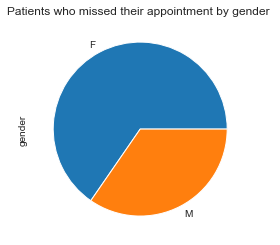

In [25]:
no_show_gender.plot(kind='pie')
plt.title("Patients who missed their appointment by gender ")

Text(0, 0.5, 'number of patients')

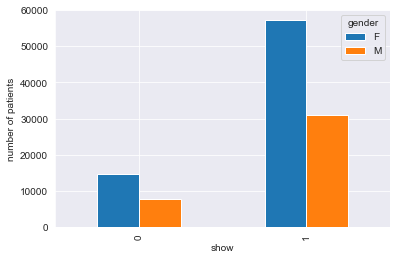

In [26]:
df.groupby(['gender','show']).size().unstack('gender').plot(kind='bar').set_ylabel('number of patients')

<h4 style='color:red'>Finding</h4> 

###### The percpercentage of females is nearly two times the number of males. So females are more likely to miss their appointment 

### Are patients with scholarships more likely to miss their appointment 

,show
scholarship,
0,0.801928
1,0.762637


Text(0.5, 1.0, 'Ratio of show or no show by scholarship')

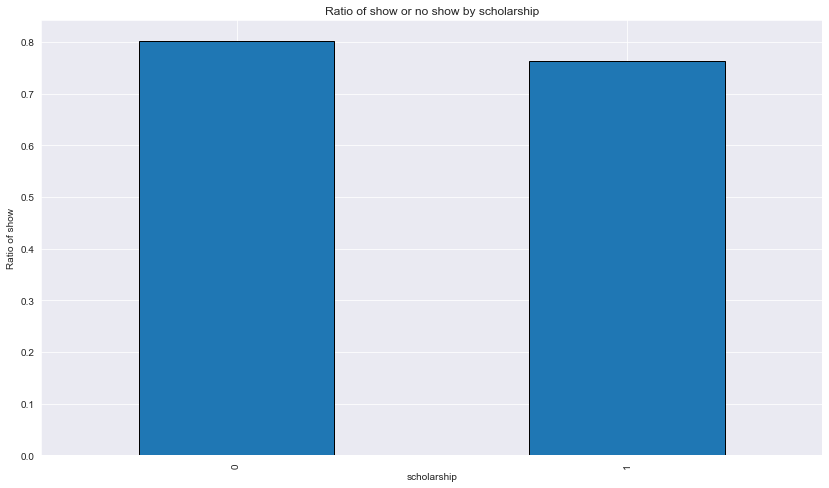

In [29]:
plot_rat(df.scholarship)
plt.title('Ratio of show or no show by scholarship')
#df.scholarship('scholarship')[['show']].mean()

<h4 style='color:blue'>Finding</h4>
    
    

###### It shows that patients with scholarship are actually more likely to miss their appointment 

### Are patients with hypertension more likely to miss their appointment 

,show
hipertension,
0,0.790963
1,0.826980


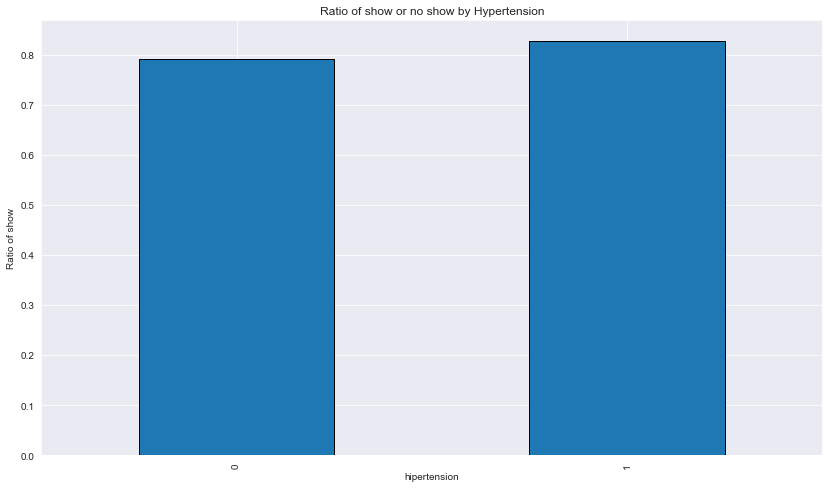

In [34]:
plot_rat(df.hipertension)
plt.title('Ratio of show or no show by Hypertension');

<h4 style='color:purple' > Finding </h4>

###### It seems that patients with Hypertension are more likely to show for their appointment 

### Are patients who dont receive SMS more likely to miss their appointment 

,show
sms_received,
0,0.832967
1,0.724255


Text(0.5, 1.0, 'Ratio of no show and show by sms_received')

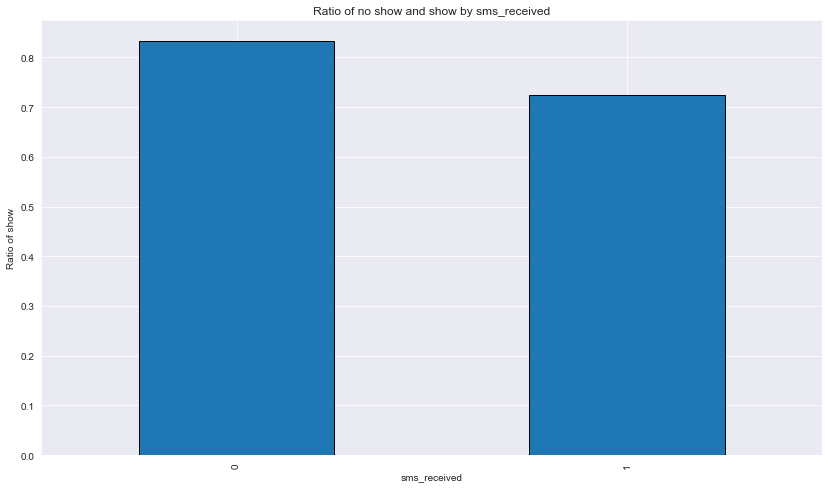

In [38]:
plot_rat(df.sms_received)
plt.title('Ratio of no show and show by sms_received')

<h4 style='color:orange'>Finding </h4>

###### Strange finding here suggest that patients who receives an SMS are more likely to miss their appointment !!

###  Is the time difference between the scheduling and appointment related to whether a patient will show 

the propotion of different time difference for patients who missed their appiontments:


,day_diff2
more_than_15,38.460505
more_than_4,32.922622
fewdays,20.565438
sameday,8.029034


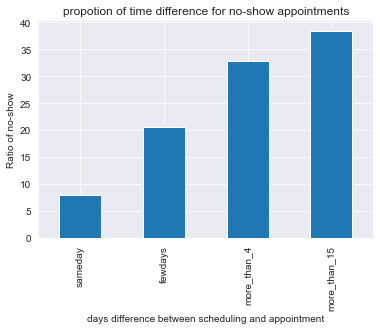

In [42]:
# Filter for positive day difference 
df1 = df[df.day_diff>=0]
#df1.day_diff.unique()
#turn day_diff into categorical column day_diff2
bin_egdes = [-1, 0 , 4, 15, 179 ]
names= ['sameday', 'fewdays','more_than_4', 'more_than_15']
df['day_diff2']= pd.cut(df1.day_diff,bin_egdes,labels=names)

#filter for no show records and count values for each category of day_diff2

no_show_day_diff = df[no_show].day_diff2.value_counts()/len(df[no_show])*100
no_show_day_diff.reindex(names).plot(kind='bar');

plt.title('propotion of time difference for no-show appointments');
plt.xlabel('days difference between scheduling and appointment');
plt.ylabel('Ratio of no-show');
print('the propotion of different time difference for patients who missed their appiontments:')
pd.DataFrame(no_show_day_diff)

<h4 styele='color:green'>Finding </h4>

###### It appears that the longer the period between the scheduling and appointment the morelikely the patients wont show up 

### Does age affect whether a patient will show up or not ?

,age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


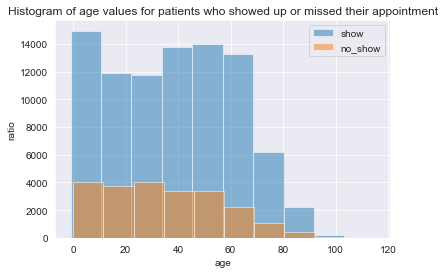

In [44]:
#plot the histogram of the age for patients who showed up and who diddnt 

df[show].age.hist(alpha=0.5, label='show')
df[no_show].age.hist(alpha=0.5, label='no_show')

plt.legend()
plt.xlabel('age')
plt.ylabel('ratio')
plt.title('Histogram of age values for patients who showed up or missed their appointment')
#ger the mean age for patients who showed up and who didn't
df[no_show][['age']].describe()

<h4 style='color:pink'>Finding </h4>

###### There is no clear relation between the age and whether the patient shows up or not, but the younger patients are more likely to miss their appointments. 

In [47]:
#get the number of records for each neighbourhood
rec_neigh=df['neighbourhood'].value_counts()
#get the number of records for patients missing their appointments for each neighbourhood
rec_neigh_no_show=df[no_show].neighbourhood.value_counts()
#percentage of patients missing their appointments for every neighbourhood
rec_neigh_no_show_percentage=rec_neigh_no_show/rec_neigh
pd.DataFrame(rec_neigh_no_show_percentage.sort_values(axis=0, ascending=False))

,neighbourhood
ILHAS OCEÃ?NICAS DE TRINDADE,1.000000
SANTOS DUMONT,0.289185
SANTA CECÃLIA,0.274554
SANTA CLARA,0.264822
ITARARÃ?,0.262664
...,...
SOLON BORGES,0.147122
MÃRIO CYPRESTE,0.145553
AEROPORTO,0.125000
ILHA DO BOI,0.085714


<a id='Conclusions'></a>

#### After analysing the dataset here are some findings:
1. Percentage of patients who didnt show up for their appointment is 20.19%
2. The percentage of females missing their appointment is nearly two times the number of males.           So females are more likely to miss their appointment 
3. It appears that the longer the period between scheduling and appointment the more likely the          patient wont show 
4. It seems the patients with scholarship are more likely to miss the appoinment 
5. A strange finding here suggest that patients who received an SMS are more likely to miss their        appointment!!
6. There is no clear relation between the age and whether the patients show up or not but the             younger patients are more likely to miss their appointment. 



<a id='Conclusions'></a>

<a id='conclusions'></a>

## Conclusions

#### After analyzing the dataset here are some findings:

1.  Percentage of patients who didn't show up for their appointment is 20.19%.
2.  The percentage of females missing their appointment is nearly two times the number of males. So females are more likely to miss their appointment.
3.  It appears that the longer the period between the scheduling and appointment the more likely the patient won't show up.
4.  It seems that patients with scholarships are actually more likely to miss their appointment.
5.  A strange finding here suggests that patients who received an SMS are more likely to miss their appointment !!
6.  There is no clear relation between the age and whether the patients show up or not but younger patients are more likely to miss their appointments.






#### Analysis Shortcoming & Data Limitations

*   The data doesn't state the exact hour of the appointment which would have been very useful to try to find out which hours have the most missing appointments and which doesn't. It could also be very useful to know the difference between scheduling and the appointment since many of the scheduling are on the same day.
*   The data doesn't state if any day is a vacation or not which can indicate if people tend to miss their appointments more on working days.
*   The age column had a negative value but according to the data creator, it means a baby not born yet (a pregnant woman).
*   When calculating the day difference between the scheduling and appointment days we had some negative value which makes no sense and might mean that the records of questions have wrong data.

## Credits to following Authors 
[Mostafa Abdelaleem](https://www.linkedin.com/in/mostafa-abdelaleem/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsMedicalAppointmentDataAnalysis30426296-2021-01-01)


[Mridul Bhandari](https://www.linkedin.com/in/mridul-bhandari/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsMedicalAppointmentDataAnalysis30426296-2021-01-01)
